In [18]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.stats as stats
import statistics

In [37]:
data = np.random.normal(4, math.sqrt(8), 50)

print(data)

[ 1.30471495  6.33457585  3.71150814  3.37865257  7.54975975  4.03595723
  3.84328455  4.39598023  5.42662311  4.57829526  4.36565501 -1.0919475
  5.47865908  5.76375165  4.33155674  3.51171211  3.88464683 -4.90593026
  5.73151435  6.76564435  4.91374651  3.62575052  8.4718809   1.2153258
  7.66580105  3.37015357  4.5647897   1.37844347 10.53259185  9.21317669
  6.11856092  4.86563023  3.96412763  3.32826397  1.25314805  1.25618552
  4.28742221  2.99253529  3.79611358  5.74369543  9.45769695  6.22359033
  9.13414344 -2.76362723  3.85614662  6.77394461  4.46939558  3.11879138
  9.13567009  5.14273181]


In [38]:
var = 0
mean = 0

for x in data:
    mean += x
mean = mean / len(data)

print('Mean: ' + str(mean))

for x in data:
    var += (x - mean) ** 2
var = var / len(data)

print('Variance: ' + str(var))

# p(u) = N(u|u0, sd0^2)

priorMean = 3
priorVar = 6
size = len(data)

postMean = (var / ((size * priorVar) + var)) * priorMean
postMean += ((size * priorVar) / ((size * priorVar) + var)) * mean

print('Posterior Mean: ' + str(postMean))

postVar = (1 / priorVar) + (size / var)

print('Posterior Variance: ' + str(postVar))

Mean: 4.510008809633799
Variance: 8.495878816117695
Posterior Mean: 4.468423645166933
Posterior Variance: 6.051873021675408


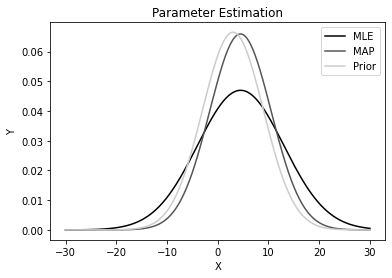

In [56]:
trueParams = np.arange(-30, 30, 0.01)
true = plt.plot(trueParams, norm.pdf(trueParams,mean,var), label = 'MLE', color = '#000')

postParams = np.arange(-30, 30, 0.01)
post = plt.plot(postParams, norm.pdf(postParams, postMean, postVar), label = 'MAP', color = '#555')

priorParams = np.arange(-30, 30, 0.01)
prior = plt.plot(priorParams, norm.pdf(priorParams, priorMean, priorVar), label = 'Prior', color = '#ccc')

plt.title('Parameter Estimation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
